In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import RMSprop, Adagrad, Adadelta
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/digit-recognizer/train.csv')

In [4]:
pixels = df.columns.drop('label')
y_column = 'label'

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df[pixels] = df[pixels].applymap(lambda x: x / 255)

In [8]:
train, validation = train_test_split(df, test_size=0.2)

In [9]:
x_train = train[pixels].values
y_train = train[y_column].values

x_val = validation[pixels].values
y_val = validation[y_column].values

In [10]:
y_train = y_train.reshape((y_train.shape[0], 1))
y_val = y_val.reshape((y_val.shape[0], 1))

In [18]:
print(x_train.shape, y_train.shape)

(33600, 784) (33600, 1)


In [14]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:676: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_t = lr.predict(x_val)

In [21]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_val, y_t)

0.91130952380952379

In [30]:
model1 = Sequential()
model1.add(Dense(units = 64, activation = 'relu', input_dim = len(pixels)))
model1.add(Dense(units = 32, activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 10, activation = 'softmax'))

In [37]:
optimizer = RMSprop (lr = 0.001) #сколрость обучения

In [38]:
model1.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [45]:
history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 32)

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 4s 120us/step - loss: 0.0895 - acc: 0.9836 - val_loss: 0.2954 - val_acc: 0.9656
Epoch 2/50
33600/33600 [==============================] - 4s 115us/step - loss: 0.0965 - acc: 0.9833 - val_loss: 0.2481 - val_acc: 0.9699
Epoch 3/50
33600/33600 [==============================] - 4s 116us/step - loss: 0.1018 - acc: 0.9826 - val_loss: 0.2561 - val_acc: 0.9677
Epoch 4/50
33600/33600 [==============================] - 4s 115us/step - loss: 0.0944 - acc: 0.9833 - val_loss: 0.2744 - val_acc: 0.9665
Epoch 5/50
33600/33600 [==============================] - 4s 115us/step - loss: 0.0972 - acc: 0.9822 - val_loss: 0.2797 - val_acc: 0.9682
Epoch 6/50
33600/33600 [==============================] - 4s 117us/step - loss: 0.1004 - acc: 0.9829 - val_loss: 0.2905 - val_acc: 0.9644
Epoch 7/50
33600/33600 [==============================] - 4s 117us/step - loss: 0.1134 - acc: 0.9819 - val_loss: 0.2618 - v

In [49]:
def plotgraph(history):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color = 'b', label = "Training loss")
    ax[0].plot(history.history['val_loss'], color = 'r', label = "Validation loss", axes = ax[0])
    legend = ax[0].legend(loc = 'best', shadow = True)
    ax[1].plot(history.history['acc'], color = 'b', label = "Training accurancy")
    ax[1].plot(history.history['val_acc'], color = 'r', label = "Validation accurancy")
    legend = ax[1].legend(loc = 'best', shadow = True)

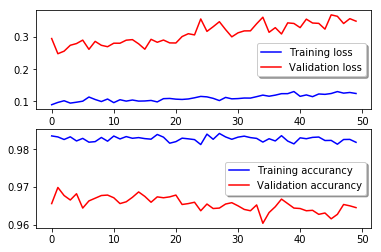

In [50]:
plotgraph(history)

In [55]:
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_dim = len(pixels)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation = 'softmax'))

In [56]:
optimizer2 = Adagrad()

In [58]:
model2.compile(optimizer = optimizer2, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 7s 201us/step - loss: 0.2926 - acc: 0.9129 - val_loss: 0.1485 - val_acc: 0.9542
Epoch 2/50
33600/33600 [==============================] - 6s 185us/step - loss: 0.1314 - acc: 0.9623 - val_loss: 0.1164 - val_acc: 0.9658
Epoch 3/50
33600/33600 [==============================] - 6s 182us/step - loss: 0.0977 - acc: 0.9721 - val_loss: 0.1015 - val_acc: 0.9689
Epoch 4/50
33600/33600 [==============================] - 6s 183us/step - loss: 0.0754 - acc: 0.9781 - val_loss: 0.0955 - val_acc: 0.9706
Epoch 5/50
33600/33600 [==============================] - 6s 184us/step - loss: 0.0602 - acc: 0.9828 - val_loss: 0.0898 - val_acc: 0.9732
Epoch 6/50
33600/33600 [==============================] - 6s 185us/step - loss: 0.0509 - acc: 0.9857 - val_loss: 0.0875 - val_acc: 0.9731
Epoch 7/50
33600/33600 [==============================] - 6s 185us/step - loss: 0.0424 - acc: 0.9880 - val_loss: 0.0856 - v

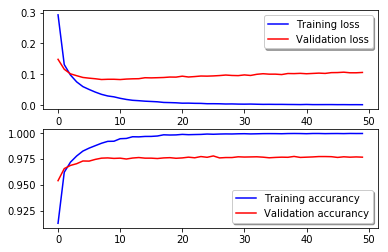

In [59]:
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 32)
plotgraph(history2)

In [62]:
optimizer3 = Adadelta()
model2.compile(optimizer = optimizer3, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 7s 212us/step - loss: 0.0112 - acc: 0.9965 - val_loss: 0.1280 - val_acc: 0.9732
Epoch 2/50
33600/33600 [==============================] - 7s 199us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.1206 - val_acc: 0.9752
Epoch 3/50
33600/33600 [==============================] - 7s 205us/step - loss: 0.0067 - acc: 0.9978 - val_loss: 0.1351 - val_acc: 0.9745
Epoch 4/50
33600/33600 [==============================] - 7s 202us/step - loss: 0.0062 - acc: 0.9980 - val_loss: 0.1308 - val_acc: 0.9764
Epoch 5/50
33600/33600 [==============================] - 7s 200us/step - loss: 0.0050 - acc: 0.9984 - val_loss: 0.1427 - val_acc: 0.9748
Epoch 6/50
33600/33600 [==============================] - 7s 199us/step - loss: 0.0050 - acc: 0.9984 - val_loss: 0.1425 - val_acc: 0.9762
Epoch 7/50
33600/33600 [==============================] - 7s 199us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.1420 - v

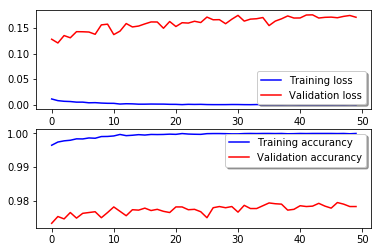

In [63]:
history3 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 32)
plotgraph(history3)

In [3]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
fileList = createFileList('../input/images-dr/')

for file in fileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

../input
../input/images-dr/5.png
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0 255 255 